In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 

## Sales at The Bread Basket bakery

### Dataset contents

In the **bakery_sales.csv** file imported below there are 20 507 items assigned to 9 684 client transactions with the information on:


*   **TransactionNo** - transaction number
*   **Items** - purchased items
*   **DateTime** - time of transaction
*   **Daypart** - time of the day
*   **DayType** - weekday or weekend.

In [39]:
bakery_data = pd.read_csv("./Preparation of the dataset/Bakery Data/bakery_sales.csv")
bakery_data

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,30/10/2016 9:58,Morning,Weekend
1,2,Scandinavian,30/10/2016 10:05,Morning,Weekend
2,2,Scandinavian,30/10/2016 10:05,Morning,Weekend
3,3,Hot chocolate,30/10/2016 10:07,Morning,Weekend
4,3,Jam,30/10/2016 10:07,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,04/09/2017 14:32,Afternoon,Weekend
20503,9682,Tea,04/09/2017 14:32,Afternoon,Weekend
20504,9683,Coffee,04/09/2017 14:57,Afternoon,Weekend
20505,9683,Pastry,04/09/2017 14:57,Afternoon,Weekend


## Notebook preparation

### Checking data types

In [40]:
bakery_data.dtypes

TransactionNo     int64
Items            object
DateTime         object
Daypart          object
DayType          object
dtype: object

In [41]:
"complete records: " + str(len(bakery_data.dropna(how="any"))) + "; total records: " + str(len(bakery_data))

'complete records: 20507; total records: 20507'

In [42]:
for column in bakery_data.columns:
  check_types = bakery_data[column].apply(lambda x: type(x))
  print(check_types.value_counts())

TransactionNo
<class 'int'>    20507
Name: count, dtype: int64
Items
<class 'str'>    20507
Name: count, dtype: int64
DateTime
<class 'str'>    20507
Name: count, dtype: int64
Daypart
<class 'str'>    20507
Name: count, dtype: int64
DayType
<class 'str'>    20507
Name: count, dtype: int64


#### Date conversion

In [43]:
bakery_data["DateTime"] = pd.to_datetime(bakery_data["DateTime"])

C:\Users\Němeček\AppData\Local\Temp\ipykernel_8052\3462474273.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  bakery_data["DateTime"] = pd.to_datetime(bakery_data["DateTime"])


In [44]:
bakery_data["Date"] = bakery_data["DateTime"].dt.date

In [45]:
bakery_data["Date"].value_counts()

Date
2017-04-02    292
2016-05-11    275
2017-04-03    257
2017-03-25    246
2017-01-28    237
             ... 
2017-09-04     69
2017-01-16     66
2016-08-12     66
2016-12-27     47
2017-01-01      1
Name: count, Length: 159, dtype: int64

In [46]:
bakery_data = bakery_data[["TransactionNo", "Items", "Date", "Daypart", "DayType"]]
bakery_data

,TransactionNo,Items,Date,Daypart,DayType
0,1,Bread,2016-10-30,Morning,Weekend
1,2,Scandinavian,2016-10-30,Morning,Weekend
2,2,Scandinavian,2016-10-30,Morning,Weekend
3,3,Hot chocolate,2016-10-30,Morning,Weekend
4,3,Jam,2016-10-30,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04,Afternoon,Weekend
20503,9682,Tea,2017-09-04,Afternoon,Weekend
20504,9683,Coffee,2017-09-04,Afternoon,Weekend
20505,9683,Pastry,2017-09-04,Afternoon,Weekend


#### Category assignment based on the number of sold products.

In [47]:
bakery_data["Items"].value_counts()

Items
Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Bacon                1
Gift voucher         1
Olum & polenta       1
Raw bars             1
Polenta              1
Name: count, Length: 94, dtype: int64

In [48]:
product_categories = list(bakery_data["Items"].value_counts().index)[0:5]
product_categories.append("Other")
product_categories
bakery_data["Item Categories"] = pd.Series(pd.Categorical(bakery_data["Items"], categories=product_categories)).fillna("Other")
bakery_data

,TransactionNo,Items,Date,Daypart,DayType,Item Categories
0,1,Bread,2016-10-30,Morning,Weekend,Bread
1,2,Scandinavian,2016-10-30,Morning,Weekend,Other
2,2,Scandinavian,2016-10-30,Morning,Weekend,Other
3,3,Hot chocolate,2016-10-30,Morning,Weekend,Other
4,3,Jam,2016-10-30,Morning,Weekend,Other
...,...,...,...,...,...,...
20502,9682,Coffee,2017-09-04,Afternoon,Weekend,Coffee
20503,9682,Tea,2017-09-04,Afternoon,Weekend,Tea
20504,9683,Coffee,2017-09-04,Afternoon,Weekend,Coffee
20505,9683,Pastry,2017-09-04,Afternoon,Weekend,Pastry


#### Converting times of day to categories

In [49]:
bakery_data["Daypart"].value_counts()

Daypart
Afternoon    11569
Morning       8404
Evening        520
Night           14
Name: count, dtype: int64

In [50]:
bakery_data["Day Part"] = pd.Series(pd.Categorical(bakery_data["Daypart"], categories=["Morning", "Afternoon", "Evening", "Night"]))
bakery_data = bakery_data[["TransactionNo", "Items", "Date", "Day Part", "DayType", "Item Categories"]]
bakery_data

,TransactionNo,Items,Date,Day Part,DayType,Item Categories
0,1,Bread,2016-10-30,Morning,Weekend,Bread
1,2,Scandinavian,2016-10-30,Morning,Weekend,Other
2,2,Scandinavian,2016-10-30,Morning,Weekend,Other
3,3,Hot chocolate,2016-10-30,Morning,Weekend,Other
4,3,Jam,2016-10-30,Morning,Weekend,Other
...,...,...,...,...,...,...
20502,9682,Coffee,2017-09-04,Afternoon,Weekend,Coffee
20503,9682,Tea,2017-09-04,Afternoon,Weekend,Tea
20504,9683,Coffee,2017-09-04,Afternoon,Weekend,Coffee
20505,9683,Pastry,2017-09-04,Afternoon,Weekend,Pastry


#### Converting day types to categories

In [51]:
bakery_data["DayType"].value_counts()

DayType
Weekday    12807
Weekend     7700
Name: count, dtype: int64

In [52]:
bakery_data["Day Type"] = pd.Series(pd.Categorical(bakery_data["DayType"], categories=["Weekday", "Weekend"]))
bakery_data = bakery_data[["TransactionNo", "Items", "Date", "Day Part","Day Type", "Item Categories"]]
bakery_data

,TransactionNo,Items,Date,Day Part,Day Type,Item Categories
0,1,Bread,2016-10-30,Morning,Weekend,Bread
1,2,Scandinavian,2016-10-30,Morning,Weekend,Other
2,2,Scandinavian,2016-10-30,Morning,Weekend,Other
3,3,Hot chocolate,2016-10-30,Morning,Weekend,Other
4,3,Jam,2016-10-30,Morning,Weekend,Other
...,...,...,...,...,...,...
20502,9682,Coffee,2017-09-04,Afternoon,Weekend,Coffee
20503,9682,Tea,2017-09-04,Afternoon,Weekend,Tea
20504,9683,Coffee,2017-09-04,Afternoon,Weekend,Coffee
20505,9683,Pastry,2017-09-04,Afternoon,Weekend,Pastry


### Creating dataframes used in the visualization

In [53]:
items_daily = bakery_data[["Date","Day Type", "Items"]].groupby(["Date", "Day Type"]).count()
transactions_daily = bakery_data[["Date","Day Type", "TransactionNo"]].groupby(["Date", "Day Type"]).nunique()
daytype_statistics_daily = pd.merge(items_daily, transactions_daily, on=["Date", "Day Type"])
daytype_statistics_daily

C:\Users\Němeček\AppData\Local\Temp\ipykernel_8052\3849302096.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  items_daily = bakery_data[["Date","Day Type", "Items"]].groupby(["Date", "Day Type"]).count()
C:\Users\Němeček\AppData\Local\Temp\ipykernel_8052\3849302096.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transactions_daily = bakery_data[["Date","Day Type", "TransactionNo"]].groupby(["Date", "Day Type"]).nunique()


Items  TransactionNo
Date       Day Type                      
2016-01-11 Weekday     150             77
           Weekend       0              0
2016-01-12 Weekday      83             47
           Weekend       0              0
2016-02-11 Weekday     164             83
...                    ...            ...
2017-12-01 Weekend       0              0
2017-12-02 Weekday       0              0
           Weekend     113             48
2017-12-03 Weekday       0              0
           Weekend     146             62

[318 rows x 2 columns]

In [54]:
items_daily = bakery_data[["Date","Day Part", "Items"]].groupby(["Date", "Day Part"]).count()
transactions_daily = bakery_data[["Date","Day Part", "TransactionNo"]].groupby(["Date", "Day Part"]).nunique()
daypart_statistics_daily = pd.merge(items_daily, transactions_daily, on=["Date", "Day Part"])
daypart_statistics_daily

C:\Users\Němeček\AppData\Local\Temp\ipykernel_8052\1760584008.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  items_daily = bakery_data[["Date","Day Part", "Items"]].groupby(["Date", "Day Part"]).count()
C:\Users\Němeček\AppData\Local\Temp\ipykernel_8052\1760584008.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transactions_daily = bakery_data[["Date","Day Part", "TransactionNo"]].groupby(["Date", "Day Part"]).nunique()


Items  TransactionNo
Date       Day Part                       
2016-01-11 Morning       56             29
           Afternoon     92             46
           Evening        2              2
           Night          0              0
2016-01-12 Morning       31             17
...                     ...            ...
2017-12-02 Night          0              0
2017-12-03 Morning       32             15
           Afternoon    114             47
           Evening        0              0
           Night          0              0

[636 rows x 2 columns]

#### Category statistics

In [55]:
items_count = bakery_data[["TransactionNo", "Items"]].groupby(["TransactionNo"]).count()
transactions_data = pd.merge(pd.DataFrame(bakery_data[["TransactionNo", "Day Type", "Day Part"]].drop_duplicates()), items_count, on="TransactionNo")
transactions_data

,TransactionNo,Day Type,Day Part,Items
0,1,Weekend,Morning,1
1,2,Weekend,Morning,2
2,3,Weekend,Morning,3
3,4,Weekend,Morning,1
4,5,Weekend,Morning,3
...,...,...,...,...
9460,9680,Weekend,Afternoon,1
9461,9681,Weekend,Afternoon,4
9462,9682,Weekend,Afternoon,4
9463,9683,Weekend,Afternoon,2


## Exercises

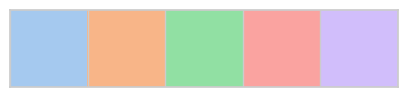

In [56]:
palette = sns.color_palette(palette="pastel", n_colors=5, desat=0.9)
sns.palplot(palette)
plt.show()

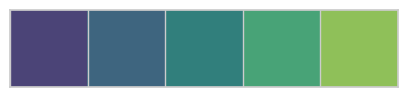

In [57]:
palette_n2 = sns.color_palette(palette="viridis", n_colors=5, desat=0.7)
sns.palplot(palette_n2) 
plt.show()

**Exercise 1**

In [58]:
top_categories = bakery_data["Items"].value_counts().head(4).index.tolist()
top_categories.append("Other")

bakery_data["Item Categories"] = bakery_data["Items"].apply(
    lambda x: x if x in top_categories else "Other"
)

C:\Users\Němeček\AppData\Local\Temp\ipykernel_8052\4135340884.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bakery_data["Item Categories"] = bakery_data["Items"].apply(


In [59]:
colors = ["#FFB3BA", "#B3E5FC", "#FFECB3", "#D1C4E9", "#C8E6C9"]

my_colormap = ListedColormap(colors)

In [60]:
category_summary = bakery_data.groupby("Item Categories")["Items"].count().reset_index()
category_summary.columns = ["Category", "Total Quantity"]
print(category_summary)

  Category  Total Quantity
0    Bread            3325
1     Cake            1025
2   Coffee            5471
3    Other            9251
4      Tea            1435


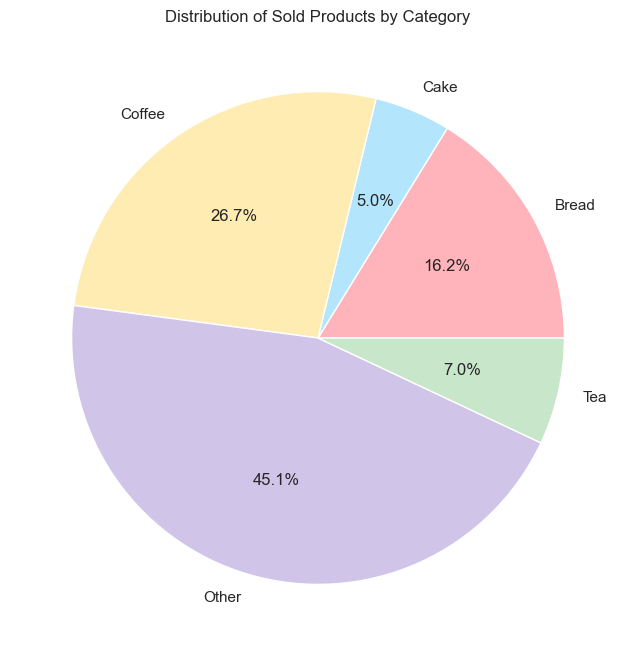

In [61]:
plt.figure(figsize=(8, 8))
plt.pie(
    category_summary["Total Quantity"], 
    labels=category_summary["Category"], 
    autopct="%1.1f%%", 
    colors=my_colormap.colors
)
plt.title("Distribution of Sold Products by Category")
plt.show()

**Exercise 2**

In [62]:
sns.set_theme(
    style="darkgrid",
    context="talk",
    palette=palette,
    )

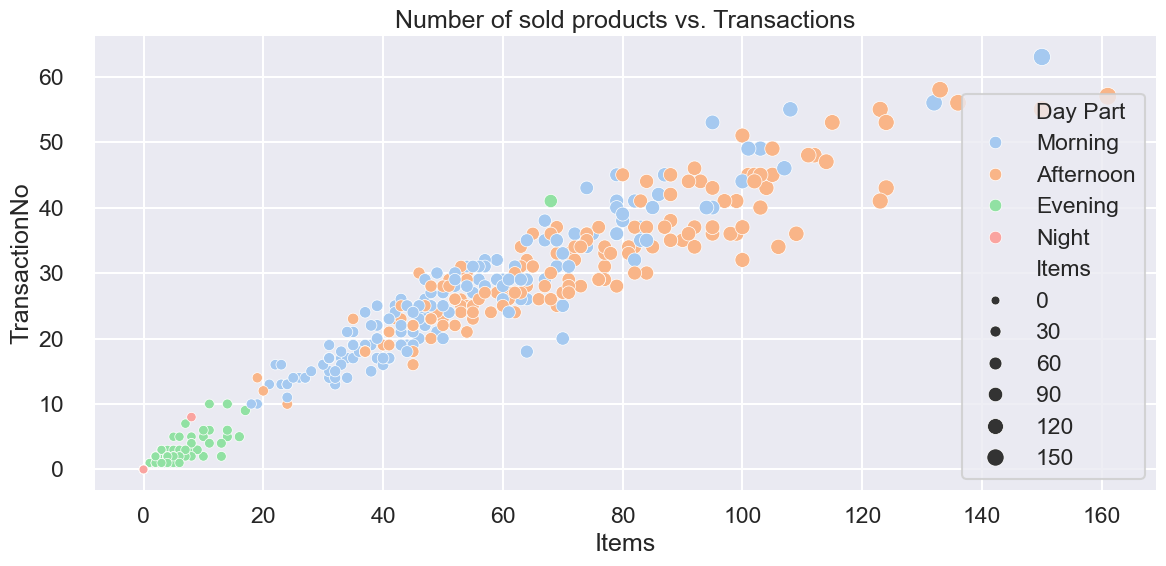

In [63]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=daypart_statistics_daily,
    x="Items",
    y="TransactionNo",
    hue="Day Part",
    size='Items',
    )
plt.title("Number of sold products vs. Transactions")
sns.despine(offset=10, bottom=True)
plt.tight_layout()
plt.show()


**Exercise 3**

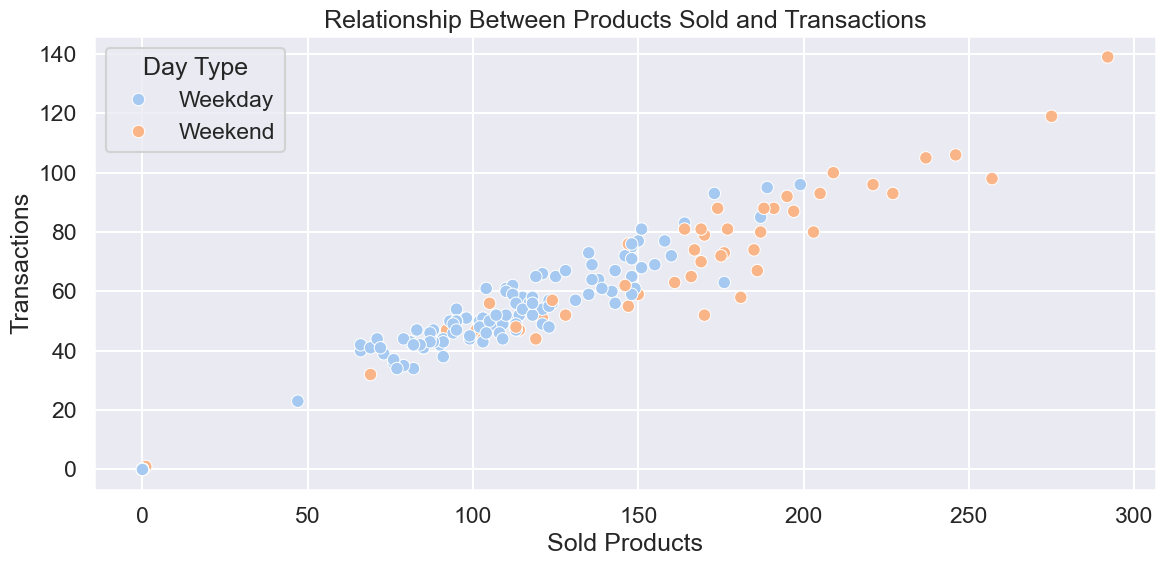

In [64]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=daytype_statistics_daily,
    x="Items",
    y="TransactionNo",
    hue="Day Type",
    )
plt.title("Relationship Between Products Sold and Transactions")
plt.xlabel("Sold Products")
plt.ylabel("Transactions")
plt.legend(title="Day Type")
plt.tight_layout()
plt.show()

**Exercise 4**

In [65]:
sns.set_theme(
    style="whitegrid",
    context="notebook",
    )

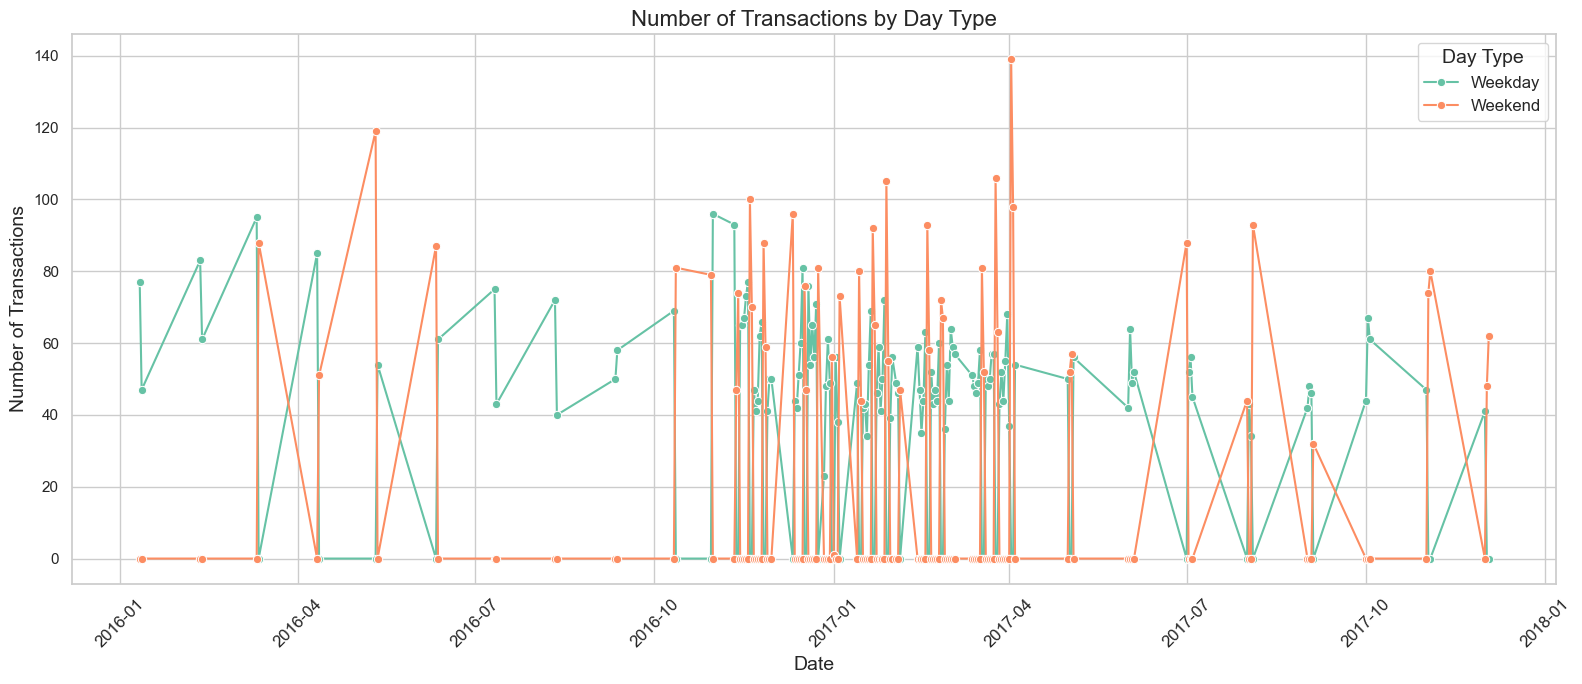

In [66]:
plt.figure(figsize=(16, 7))

sns.lineplot(
    data=daytype_statistics_daily,
    x="Date",
    y="TransactionNo",
    hue="Day Type",
    marker="o",
    palette="Set2"
)

plt.title("Number of Transactions by Day Type", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Transactions", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Day Type", fontsize=12, title_fontsize=14)

plt.tight_layout()

plt.show()